In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Aditi Tiwari\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Introduction to pandas

### Task 1: Basic DataFrame Operations
I.	Download a dataset of your choice (CSV, Excel, or any other format). And load the dataset into a Pandas DataFrame.

II.	Display the first 5 rows of the dataset. Check for missing values and handle them appropriately. Get a summary of the dataset using describe().

III.	Select a subset of columns from the DataFrame. Use both label-based and position-based indexing. Create a new DataFrame by filtering rows based on a condition.

In [44]:
import pandas as pd
car_sales = pd.read_csv("car-sales-Copy1.csv")
car_sales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4.0,"4,000"
1,Honda,NaN,87899,4.0,"5,000"
2,Toyota,Blue,32549,3.0,"7,000"
3,BMW,Black,11179,5.0,"22,000"
4,Nissan,White,213095,4.0,"3,500"


In [45]:
car_sales[car_sales['Make'] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4.0,"4,000"
2,Toyota,Blue,32549,3.0,"7,000"
5,Toyota,Green,99213,NaN,"4,500"
8,Toyota,White,60000,NaN,"6,250"


### Task 2: Data Cleaning and Preprocessing
I.	Identify missing values in the dataset. Decide on a strategy to handle missing values (e.g., imputation or removal). Implement the chosen strategy and explain the reasoning.

II.	Create a new column by applying a mathematical operation on existing columns. Convert a categorical variable into numerical representation (e.g., using one-hot encoding).

III.	Group the data by a specific column. Apply aggregation functions (sum, mean, count) to the grouped data. Present the results in a meaningful way.

In [46]:
#Remove all rows wit NULL values from the DataFrame.
car_sales_missing_dropped = car_sales.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4.0,"4,000"
2,Toyota,Blue,32549,3.0,"7,000"
3,BMW,Black,11179,5.0,"22,000"
4,Nissan,White,213095,4.0,"3,500"
7,Honda,Blue,54738,4.0,"7,000"
9,Nissan,White,31600,4.0,"9,700"


In [47]:
# Column from python list
fuel_economy = [7.5, 9.2, 8.3, 7.3, 8.2, 9.4, 8.6, 7.4, 8.8, 7.8]
car_sales['Fuel (per 100Km)'] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Fuel (per 100Km)
0,Toyota,White,150043,4.0,"4,000",7.5
1,Honda,NaN,87899,4.0,"5,000",9.2
2,Toyota,Blue,32549,3.0,"7,000",8.3
3,BMW,Black,11179,5.0,"22,000",7.3
4,Nissan,White,213095,4.0,"3,500",8.2
5,Toyota,Green,99213,NaN,"4,500",9.4
6,Honda,NaN,45698,4.0,"7,500",8.6
7,Honda,Blue,54738,4.0,"7,000",7.4
8,Toyota,White,60000,NaN,"6,250",8.8
9,Nissan,White,31600,4.0,"9,700",7.8


In [48]:
# to find fuel used in car's lifetime
car_sales['Total fuel used (L)'] = car_sales['Odometer (KM)']/100 * car_sales['Fuel (per 100Km)']
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Fuel (per 100Km),Total fuel used (L)
0,Toyota,White,150043,4.0,"4,000",7.5,11253.225
1,Honda,NaN,87899,4.0,"5,000",9.2,8086.708
2,Toyota,Blue,32549,3.0,"7,000",8.3,2701.567
3,BMW,Black,11179,5.0,"22,000",7.3,816.067
4,Nissan,White,213095,4.0,"3,500",8.2,17473.790
5,Toyota,Green,99213,NaN,"4,500",9.4,9326.022
6,Honda,NaN,45698,4.0,"7,500",8.6,3930.028
7,Honda,Blue,54738,4.0,"7,000",7.4,4050.612
8,Toyota,White,60000,NaN,"6,250",8.8,5280.000
9,Nissan,White,31600,4.0,"9,700",7.8,2464.800


In [49]:
# Remove commas from numeric columns
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].replace({',': ''}, regex=True).astype(float)
car_sales['Price'] = car_sales['Price'].replace({',': ''}, regex=True).astype(float)

# Grouping by 'Make'
grouped_data = car_sales.groupby('Make')

# Applying aggregation functions
sum_data = grouped_data.agg({'Odometer (KM)': 'sum', 'Price': 'sum'})
mean_data = grouped_data.agg({'Odometer (KM)': 'mean', 'Price': 'mean'})
count_data = grouped_data.size().reset_index(name='count')

# Presenting the results
print("Total Odometer and Price by Make:", sum_data)
print("\nAverage Odometer and Price by Make:", mean_data)
print("\nNumber of Transactions by Make:", count_data)


Total Odometer and Price by Make:         Odometer (KM)    Price
Make                          
BMW           11179.0  22000.0
Honda        188335.0  19500.0
Nissan       244695.0  13200.0
Toyota       341805.0  21750.0

Average Odometer and Price by Make:         Odometer (KM)    Price
Make                          
BMW      11179.000000  22000.0
Honda    62778.333333   6500.0
Nissan  122347.500000   6600.0
Toyota   85451.250000   5437.5

Number of Transactions by Make:      Make  count
0     BMW      1
1   Honda      3
2  Nissan      2
3  Toyota      4


### Task 3: Loading and analyzing the dataset
Load two different datasets. Merge them using different types of joins (inner, outer, left, right). Analyze the impact of each type of join on the merged dataset.

In [51]:
import pandas as pd

# Creating and saving two dataframes as CSV files
data1 = {'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']}
data2 = {'ID': [2, 3, 4], 'Age': [25, 30, 22]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Save dataframes to CSV files
df1.to_csv('data1.csv', index=False)
df2.to_csv('data2.csv', index=False)

# Load datasets
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')

# Display the original datasets
print("DataFrame 1:")
print(df1)

print("\nDataFrame 2:")
print(df2)

# Inner Join
inner_merged = pd.merge(df1, df2, on='ID', how='inner')
print("\nInner Join Result:")
print(inner_merged)

# Outer Join
outer_merged = pd.merge(df1, df2, on='ID', how='outer')
print("\nOuter Join Result:")
print(outer_merged)

# Left Join
left_merged = pd.merge(df1, df2, on='ID', how='left')
print("\nLeft Join Result:")
print(left_merged)

# Right Join
right_merged = pd.merge(df1, df2, on='ID', how='right')
print("\nRight Join Result:")
print(right_merged)


DataFrame 1:
   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie

DataFrame 2:
   ID  Age
0   2   25
1   3   30
2   4   22

Inner Join Result:
   ID     Name  Age
0   2      Bob   25
1   3  Charlie   30

Outer Join Result:
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  22.0

Left Join Result:
   ID     Name   Age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0

Right Join Result:
   ID     Name  Age
0   2      Bob   25
1   3  Charlie   30
2   4      NaN   22


### Task 4: Visualization
I.	Create a bar plot, line plot, and scatter plot using Pandas plotting functions. Customize the plots to make them more informative.

II.	Visualize the correlation matrix of numerical columns. Highlight highly correlated features.

III.	Create histograms and box plots for numerical columns. Analyze the distribution and presence of outliers

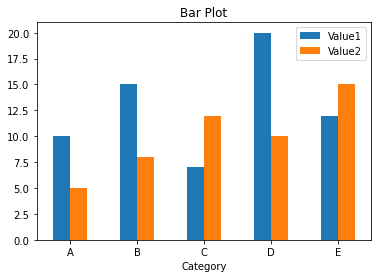

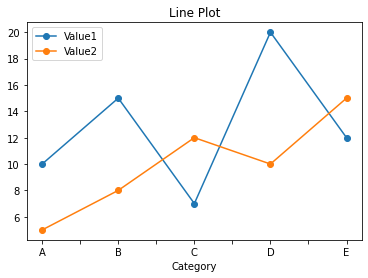

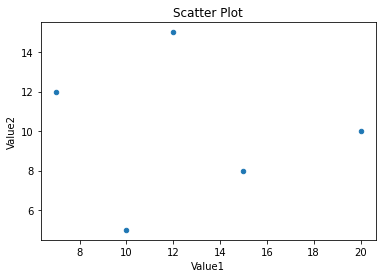

In [53]:
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Value1': [10, 15, 7, 20, 12],
        'Value2': [5, 8, 12, 10, 15]}

df = pd.DataFrame(data)

# Bar plot
df.plot(kind='bar', x='Category', y=['Value1', 'Value2'], rot=0, title='Bar Plot')
plt.show()

# Line plot
df.plot(kind='line', x='Category', y=['Value1', 'Value2'], marker='o', title='Line Plot')
plt.show()

# Scatter plot
df.plot(kind='scatter', x='Value1', y='Value2', title='Scatter Plot')
plt.show()

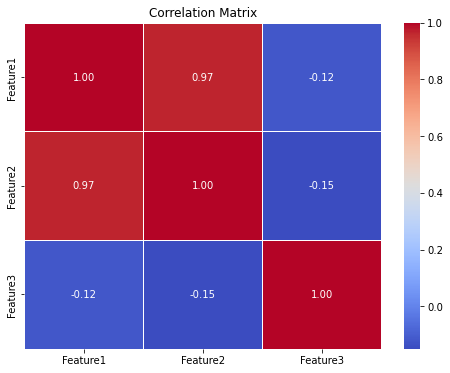

In [54]:
# II. Visualize the correlation matrix

# Generate some correlated data for illustration
np.random.seed(42)
correlated_data = np.random.randn(100, 3)
correlated_data[:, 1] = 2 * correlated_data[:, 0] + np.random.randn(100) * 0.5

correlation_matrix = pd.DataFrame(correlated_data, columns=['Feature1', 'Feature2', 'Feature3']).corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

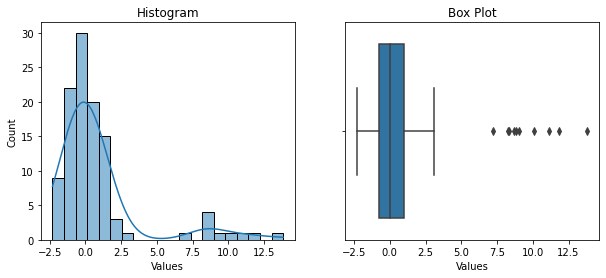

In [55]:
# III. Create histograms and box plots

# Sample data with outliers
outliers_data = pd.DataFrame({'Values': np.concatenate([np.random.normal(0, 1, 100), np.random.normal(10, 2, 10)])})

# Histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(outliers_data['Values'], bins=20, kde=True)
plt.title('Histogram')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=outliers_data['Values'])
plt.title('Box Plot')

plt.show()

## Exploring Numpy

### Task 5: Basic NumPy Operations
1.	Create a NumPy array 'arr' with values from 1 to 10.
2.	Create another NumPy array 'arr2' with values from 11 to 20.
3.	Add, subtract, multiply, and divide 'arr' and 'arr2'. Print the results.

In [58]:
# 1. Create a NumPy array 'arr' with values from 1 to 10.
arr = np.arange(1, 11)
print("Array 'arr':", arr)

Array 'arr': [ 1  2  3  4  5  6  7  8  9 10]


In [59]:
# 2. Create another NumPy array 'arr2' with values from 11 to 20.
arr2 = np.arange(11, 21)
print("Array 'arr2':", arr2)

Array 'arr2': [11 12 13 14 15 16 17 18 19 20]


In [60]:
# 3. Perform arithmetic operations and print the results.
addition_result = arr + arr2
subtraction_result = arr - arr2
multiplication_result = arr * arr2
division_result = arr / arr2

print("Addition Result:", addition_result)
print("Subtraction Result:", subtraction_result)
print("Multiplication Result:", multiplication_result)
print("Division Result:", division_result)


Addition Result: [12 14 16 18 20 22 24 26 28 30]
Subtraction Result: [-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
Multiplication Result: [ 11  24  39  56  75  96 119 144 171 200]
Division Result: [0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5       ]


### Task 6: Array Manipulation
1.	Reshape 'arr' into a 2x5 matrix.
2.	Transpose the matrix obtained in the previous step.
3.	Flatten the transposed matrix into a 1D array.
4.	Stack 'arr' and 'arr2' vertically. Print the result.

In [61]:
# 1. Reshape 'arr' into a 2x5 matrix.
arr_reshaped = arr.reshape(2, 5)
print("1. Reshaped Array (2x5):")
print(arr_reshaped)

1. Reshaped Array (2x5):
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [62]:
# 2. Transpose the matrix obtained in the previous step.
arr_transposed = arr_reshaped.T
print("\n2. Transposed Array:")
print(arr_transposed)


2. Transposed Array:
[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]


In [63]:
# 3. Flatten the transposed matrix into a 1D array.
arr_flattened = arr_transposed.flatten()
print("\n3. Flattened Transposed Array (1D):", arr_flattened)


3. Flattened Transposed Array (1D): [ 1  6  2  7  3  8  4  9  5 10]


In [64]:
# 4. Stack 'arr' and 'arr2' vertically. Print the result.
stacked_vertical = np.vstack((arr, arr2))
print("\n4. Vertically Stacked Arrays:")
print(stacked_vertical)


4. Vertically Stacked Arrays:
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]


### Task 7: Statistical Operations
1.	Calculate the mean, median, and standard deviation of 'arr'.
2.	Find the maximum and minimum values in 'arr'.
3.	Normalize 'arr' (subtract the mean and divide by the standard deviation).


In [67]:
# Calculate mean, median, and standard deviation of 'arr'
arr_mean = np.mean(arr)
arr_median = np.median(arr)
arr_std = np.std(arr)
print("Mean of 'arr':", arr_mean)
print("Median of 'arr':", arr_median)
print("Standard Deviation of 'arr':", arr_std)

Mean of 'arr': 5.5
Median of 'arr': 5.5
Standard Deviation of 'arr': 2.8722813232690143


In [68]:
# Find maximum and minimum values in 'arr'
arr_max = np.max(arr)
arr_min = np.min(arr)
print("Maximum Value in 'arr':", arr_max)
print("Minimum Value in 'arr':", arr_min)

Maximum Value in 'arr': 10
Minimum Value in 'arr': 1


In [69]:
# Normalize 'arr' (subtract the mean and divide by the standard deviation)
arr_normalized = (arr - arr_mean) / arr_std
print("\nNormalized 'arr':", arr_normalized)


Normalized 'arr': [-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]


### Task 8: Boolean Indexing
1.	Create a boolean array 'bool_arr' for elements in 'arr' greater than 5.
2.	Use 'bool_arr' to extract the elements from 'arr' that are greater than 5.

In [70]:
import numpy as np

# Create a NumPy array 'arr' with values from 1 to 10.
arr = np.arange(1, 11)
print("Original 'arr':", arr)

# Create a boolean array 'bool_arr' for elements in 'arr' greater than 5.
bool_arr = arr > 5
print("\nBoolean array 'bool_arr':", bool_arr)

Original 'arr': [ 1  2  3  4  5  6  7  8  9 10]

Boolean array 'bool_arr': [False False False False False  True  True  True  True  True]


In [71]:
# Use 'bool_arr' to extract elements from 'arr' that are greater than 5.
elements_greater_than_5 = arr[bool_arr]
print("\nElements in 'arr' greater than 5:", elements_greater_than_5)


Elements in 'arr' greater than 5: [ 6  7  8  9 10]


### Task 9: Random Module
1.	Generate a 3x3 matrix with random values between 0 and 1.
2.	Create an array of 10 random integers between 1 and 100.
3.	Shuffle the elements of 'arr' randomly.

In [72]:
random_matrix = np.random.rand(3, 3)
print("Random 3x3 Matrix:")
print(random_matrix)

Random 3x3 Matrix:
[[0.41039683 0.98237862 0.1120389 ]
 [0.3978556  0.96947043 0.86550713]
 [0.81707207 0.25790283 0.17088759]]


In [73]:
random_integers = np.random.randint(1, 101, 10)
print("\nArray of 10 Random Integers:")
print(random_integers)


Array of 10 Random Integers:
[51 62 57 66 79 75  8 26 51 45]


In [74]:
arr = np.array([1, 2, 3, 4, 5])
np.random.shuffle(arr)
print("\nShuffled 'arr':", arr)


Shuffled 'arr': [5 3 2 1 4]


### Task 10: Universal Functions (ufunc)
1.	Apply the square root function to all elements in 'arr'.
2.	Use the exponential function to calculate exex for each element in 'arr'.

In [75]:
arr_sqrt = np.sqrt(arr)
print("\nSquare Root of 'arr':", arr_sqrt)


Square Root of 'arr': [2.23606798 1.73205081 1.41421356 1.         2.        ]


In [76]:
arr_exp = np.exp(arr)
print("Exponential of 'arr':", arr_exp)

Exponential of 'arr': [148.4131591   20.08553692   7.3890561    2.71828183  54.59815003]


### Task 11: Linear Algebra Operations
1.	Create a 3x3 matrix 'mat_a' with random values.
2.	Create a 3x1 matrix 'vec_b' with random values.
3.	Multiply 'mat_a' and 'vec_b' using the dot product.



In [77]:
mat_a = np.random.rand(3, 3)
print("\nRandom 3x3 Matrix 'mat_a':")
print(mat_a)


Random 3x3 Matrix 'mat_a':
[[0.32367924 0.42543644 0.50761038]
 [0.24240973 0.11483682 0.61062004]
 [0.28863055 0.58123822 0.15436272]]


In [78]:
vec_b = np.random.rand(3, 1)
print("\nRandom 3x1 Matrix 'vec_b':")
print(vec_b)


Random 3x1 Matrix 'vec_b':
[[0.4811401 ]
 [0.53258943]
 [0.05182354]]


In [79]:
result_dot_product = np.dot(mat_a, vec_b)
print("\nResult of Matrix Multiplication (Dot Product):")
print(result_dot_product)


Result of Matrix Multiplication (Dot Product):
[[0.40862418]
 [0.20943841]
 [0.45643269]]


### Task 12: Broadcasting
1.	Create a 2D array 'matrix' with values from 1 to 9.
2.	Subtract the mean of each row from each element in that row.

In [80]:
matrix = np.arange(1, 10).reshape(3, 3)
print("\n2D Array 'matrix':")
print(matrix)


2D Array 'matrix':
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [81]:
mean_row = matrix.mean(axis=1, keepdims=True)
result_broadcasting = matrix - mean_row
print("\nResult after Broadcasting (subtracting mean of each row):")
print(result_broadcasting)


Result after Broadcasting (subtracting mean of each row):
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
